# Recommenders Assignments

## 1. Content-Based Filtering: Cosine Similarity

In [1]:
# 1. Read in the data from the first tab of the Movie Ratings spreadsheet, which contains genre labels
import pandas as pd

movies = pd.read_excel('../Data/Movie_Ratings.xlsx')
movies.head()

,Movie_ID,Movie_Title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [5]:
# 2. Remove the non-genre columns of the movie genre data
#movies.iloc[:,2:]
genres = movies.drop(columns=['Movie_ID']).set_index('Movie_Title')
genres.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Movie_Title,,,,,,,,,,,,,,,,,,
Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [6]:
# 3. Calculate the cosine similarity of Toy Story (1995) and Get Shorty (1995)
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(genres.loc[['Toy Story (1995)', 'Get Shorty (1995)']])

array([[1.        , 0.33333333],
       [0.33333333, 1.        ]])

In [7]:
# 4. Calculate the cosine similarity of Toy Story (1995) compared with all the movies
cosine_similarity(genres)

array([[1.        , 0.        , 0.        , ..., 0.        , 0.57735027,
        0.        ],
       [0.        , 1.        , 0.57735027, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.57735027, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.70710678],
       [0.57735027, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.70710678, 0.        ,
        1.        ]])

In [14]:
cosine_df = pd.DataFrame(cosine_similarity(genres), index=movies['Movie_Title'], columns=movies['Movie_Title']).reset_index()
cosine_df.head()

Movie_Title,Movie_Title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
0,Toy Story (1995),1.000000,0.000000,0.00000,0.333333,0.000000,0.00000,0.000000,0.666667,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.57735,0.00000
1,GoldenEye (1995),0.000000,1.000000,0.57735,0.333333,0.333333,0.00000,0.000000,0.000000,0.00000,...,0.816497,0.00000,0.00000,0.00000,0.00000,0.00000,0.408248,0.000000,0.00000,0.00000
2,Four Rooms (1995),0.000000,0.577350,1.00000,0.000000,0.577350,0.00000,0.000000,0.000000,0.00000,...,0.707107,0.00000,0.00000,0.00000,0.00000,0.00000,0.707107,0.000000,0.00000,0.00000
3,Get Shorty (1995),0.333333,0.333333,0.00000,1.000000,0.333333,0.57735,0.408248,0.666667,0.57735,...,0.408248,0.57735,0.57735,0.57735,0.57735,0.57735,0.000000,0.408248,0.57735,0.57735
4,Copycat (1995),0.000000,0.333333,0.57735,0.333333,1.000000,0.57735,0.408248,0.333333,0.57735,...,0.408248,0.57735,0.57735,0.57735,0.57735,0.57735,0.408248,0.408248,0.00000,0.57735


In [15]:
cosine_df[['Movie_Title', 'Toy Story (1995)']]

Movie_Title,Movie_Title,Toy Story (1995)
0,Toy Story (1995),1.000000
1,GoldenEye (1995),0.000000
2,Four Rooms (1995),0.000000
3,Get Shorty (1995),0.333333
4,Copycat (1995),0.000000
...,...,...
1677,Mat' i syn (1997),0.000000
1678,B. Monkey (1998),0.000000
1679,Sliding Doors (1998),0.000000
1680,You So Crazy (1994),0.577350


In [19]:
# 5. Return the top 5 movies with the highest cosine similarity
cosine_df[['Movie_Title', 'Toy Story (1995)']].sort_values(by='Toy Story (1995)', ascending=False).head(6)

Movie_Title,Movie_Title,Toy Story (1995)
0,Toy Story (1995),1.000000
421,Aladdin and the King of Thieves (1996),1.000000
94,Aladdin (1992),0.866025
1218,"Goofy Movie, A (1995)",0.866025
242,Jungle2Jungle (1997),0.816497
622,Angels in the Outfield (1994),0.816497


## 2. User-Item Matrix

In [20]:
# 1. Read in the movies, users and ratings tabs of the spreadsheet into three DataFrames
users = pd.read_excel('../Data/Movie_Ratings.xlsx', sheet_name=1)
users.head()

,User_ID,Age,Gender,Occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [21]:
ratings = pd.read_excel('../Data/Movie_Ratings.xlsx', sheet_name=2)
ratings.head()

,User_ID,Movie_ID,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [24]:
ratings.describe() # useful to decide what to fill any NaN value

,User_ID,Movie_ID,Rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


In [26]:
# 2. Use .pivot to restructure the ratings data into a user-item matrix
X = ratings.pivot(index='User_ID', columns='Movie_ID', values='Rating').fillna(3)
X.head()

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
User_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
5,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


## 3. TruncatedSVD

In [27]:
# 1. Apply TruncatedSVD to the user-item matrix from the last assignment
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
svd.fit(X)

TruncatedSVD()

In [28]:
# 2. View the user-item matrix and the shape of the user-item matrix
X.head()

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
User_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
5,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [29]:
X.shape

(943, 1682)

In [32]:
# 3. View the U matrix and the shape of the U matrix
U = svd.transform(X)
U_df = pd.DataFrame(U)
U_df.head()

,0,1
0,127.325618,7.173014
1,124.145754,-2.173869
2,122.727835,-2.533027
3,123.802128,-2.822308
4,122.566026,0.754479


In [34]:
U.shape # users x latent features

(943, 2)

In [37]:
# 4. View the VT matrix and the shape of the VT matrix
VT = svd.components_
VT_df = pd.DataFrame(VT)
VT_df

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.027515,0.024345,0.024133,0.025100,0.024327,0.024231,0.026796,0.025988,0.026408,0.024741,...,0.024100,0.024109,0.024100,0.024091,0.024100,0.024083,0.024100,0.024091,0.024100,0.024100
1,0.068071,0.008370,-0.007015,0.051881,-0.004403,-0.009123,0.061829,0.073484,0.052806,0.007769,...,-0.010383,-0.009653,-0.010383,-0.010600,-0.010383,-0.009784,-0.010383,-0.010083,-0.010383,-0.010383


In [39]:
VT_df.shape # latent features x movies

(2, 1682)

## 4. Choosing the Number of Components

In [40]:
# 1. Fit a TruncatedSVD model with 500 components
svd500 = TruncatedSVD(n_components=500)
svd500.fit(X)

TruncatedSVD(n_components=500)

In [42]:
U500 = svd500.transform(X)
pd.DataFrame(U500)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,127.325618,7.173031,-0.907461,5.231709,-2.167019,-1.874486,4.432229,2.894944,-2.266183,0.029382,...,0.058932,0.069013,0.146795,0.172726,0.039598,0.048016,0.074073,-0.111291,-0.026997,0.140510
1,124.145754,-2.173872,-0.531446,0.834728,2.276656,-0.611334,0.515801,2.473437,-1.182575,-0.290647,...,-0.138254,0.313998,-0.277577,0.159654,-0.289267,-0.255867,-0.219287,0.143943,0.000108,0.021240
2,122.727835,-2.533028,-0.567466,-0.600540,-0.735368,0.202150,0.220568,-1.349227,-0.322606,-0.567155,...,0.089408,-0.142984,-0.146601,0.274667,0.142242,-0.147321,-0.237936,-0.092347,0.598327,-0.170177
3,123.802128,-2.822308,0.533045,0.232890,-0.125395,0.595281,0.011407,0.062385,0.514061,0.398184,...,0.060752,-0.081069,-0.196536,-0.063070,-0.142254,0.046882,-0.078409,-0.240621,0.084310,-0.050718
4,122.566026,0.754483,-0.591899,1.772757,-4.253326,1.408859,3.002253,2.684717,-0.209389,1.068306,...,0.010524,0.046090,0.129394,-0.018644,0.049189,0.077675,-0.022199,-0.261756,0.063713,-0.032616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,124.551607,-2.591700,1.892229,0.216106,1.403485,-0.812941,-0.819922,2.263281,1.267616,-1.846754,...,-0.073390,-0.362379,0.063479,0.169313,-0.241633,0.308060,-0.419713,0.206718,-0.309415,0.196904
939,124.295574,0.039667,0.322963,0.499173,0.087867,-0.160903,-0.132286,0.415009,0.170102,1.807377,...,-0.072321,0.284861,0.142147,0.129710,-0.039110,0.032809,-0.142926,0.163358,-0.135335,0.172565
940,123.591935,-2.361526,0.629931,0.646140,-0.127538,0.178851,0.843847,0.894579,0.584616,-0.683615,...,0.084571,-0.257163,-0.174548,-0.235054,0.190674,0.217487,-0.165163,-0.086368,-0.044548,-0.251243
941,125.558040,1.714066,0.784657,-3.327618,0.484158,0.877255,-1.043917,0.383243,-0.829650,0.285739,...,0.243756,0.299929,0.033930,-0.025750,-0.250632,-0.146763,0.230545,-0.312420,0.061263,0.464331


In [43]:
X.shape

(943, 1682)

In [44]:
U500.shape

(943, 500)

In [47]:
# 2. Plot the cumulative explained variance ratios
import numpy as np

np.cumsum(svd500.explained_variance_ratio_).round(2)

# prep the data for line plot
cum_evr500 = list(zip(range(1, U500.shape[1] + 1), np.cumsum(svd500.explained_variance_ratio_)))
cum_evr500

[(1, 0.026342243723369935),
 (2, 0.09670746059197126),
 (3, 0.13352313267970692),
 (4, 0.15416135834298672),
 (5, 0.17065872214204197),
 (6, 0.18475289185595162),
 (7, 0.19777923632260405),
 (8, 0.2090016375876505),
 (9, 0.21951128949317303),
 (10, 0.22883464805499645),
 (11, 0.23775293399909697),
 (12, 0.24629115603506885),
 (13, 0.25438713039454613),
 (14, 0.2620810121696748),
 (15, 0.26938786056882524),
 (16, 0.2763499247194579),
 (17, 0.2830947136284864),
 (18, 0.28954257280168416),
 (19, 0.2958649423330121),
 (20, 0.3019866643757111),
 (21, 0.30802005306536145),
 (22, 0.3139973586073391),
 (23, 0.31977398609707053),
 (24, 0.32542393271570413),
 (25, 0.330959135047948),
 (26, 0.33638743816101657),
 (27, 0.3416598544719028),
 (28, 0.346877842676963),
 (29, 0.3520563493113151),
 (30, 0.35710688346069513),
 (31, 0.3620849315227939),
 (32, 0.36695349298760443),
 (33, 0.371794522986824),
 (34, 0.3765442619193417),
 (35, 0.3812582748940539),
 (36, 0.38591203271865093),
 (37, 0.3904472710

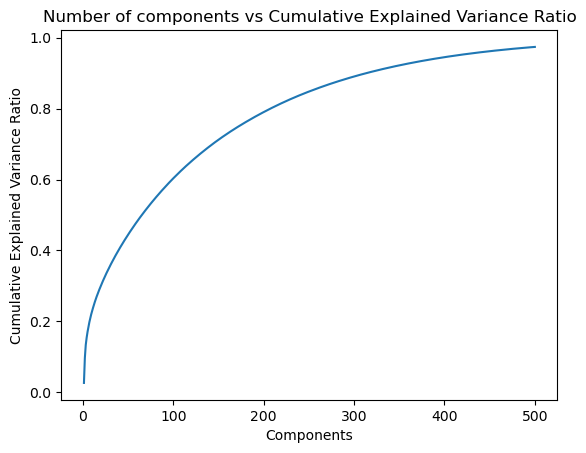

In [48]:
# 80%+ of the variance is captured at 2 components --> choose a 2 component model
cum_evr500_df = pd.DataFrame(cum_evr500).set_index(0)
cum_evr500_df.plot(
    title= 'Number of components vs Cumulative Explained Variance Ratio',
    xlabel= 'Components',
    ylabel= 'Cumulative Explained Variance Ratio',
    legend= False
);

In [14]:
# 3. Suggest a “good” number of components that best captures the info in the data set
# 250 components captures ~84% of the variance.

In [49]:
# 4. Fit another TruncatedSVD model with the “good” number of components
# 1. Fit a TruncatedSVD model with 500 components
svd250 = TruncatedSVD(n_components=250)
svd250.fit(X)

TruncatedSVD(n_components=250)

In [50]:
U250 = svd250.transform(X)
pd.DataFrame(U250)

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,127.325618,7.173031,-0.907461,5.231709,-2.167019,-1.874485,4.432229,2.894944,-2.266183,0.029379,...,-0.090331,0.376659,0.372488,-0.437799,0.099027,0.112449,-0.642332,-0.195015,0.800666,-0.234634
1,124.145754,-2.173872,-0.531446,0.834728,2.276656,-0.611334,0.515802,2.473437,-1.182575,-0.290646,...,0.095421,0.066039,-0.743839,-0.008371,0.333874,-0.131557,-0.531426,-0.238290,0.069564,0.158934
2,122.727835,-2.533028,-0.567466,-0.600540,-0.735368,0.202150,0.220568,-1.349227,-0.322606,-0.567153,...,-0.329323,-0.321297,0.045462,-0.073668,-0.351203,-0.259146,0.357635,0.013285,0.569928,0.238039
3,123.802128,-2.822308,0.533045,0.232890,-0.125395,0.595281,0.011407,0.062385,0.514061,0.398186,...,0.591681,0.376883,0.100171,0.020213,-0.408548,-0.084167,-0.263669,-0.208425,0.359136,-0.467106
4,122.566026,0.754483,-0.591899,1.772757,-4.253326,1.408860,3.002252,2.684717,-0.209390,1.068308,...,-0.226847,-0.035460,0.540231,-0.771379,0.567186,-0.177692,0.149858,-0.032387,0.136442,-0.397025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,124.551607,-2.591700,1.892229,0.216106,1.403485,-0.812941,-0.819922,2.263281,1.267617,-1.846755,...,-0.089206,-0.056352,-0.055776,0.329560,0.429974,0.178359,0.423911,-0.352273,-0.570783,0.144125
939,124.295574,0.039667,0.322963,0.499173,0.087867,-0.160903,-0.132286,0.415008,0.170101,1.807378,...,-0.212001,1.167406,-0.159786,-0.966233,-0.168690,-0.460283,-0.200393,-0.380233,0.055121,-0.343432
940,123.591935,-2.361526,0.629931,0.646140,-0.127538,0.178851,0.843847,0.894579,0.584615,-0.683614,...,0.003458,-0.109078,0.217938,0.114848,-0.039036,-0.147068,0.342440,-0.143370,0.225684,0.038246
941,125.558040,1.714066,0.784657,-3.327618,0.484158,0.877255,-1.043917,0.383244,-0.829650,0.285739,...,0.576968,-0.364423,0.508771,0.449614,-0.356561,0.839869,0.165358,0.116401,-0.069431,-0.086132


In [51]:
X.shape

(943, 1682)

In [52]:
U250.shape

(943, 250)

## 5. Making Collaborative Filtering Recommendations

In [16]:
# 1. View the new user vector
import pandas as pd
import numpy as np

# read in the movies tab of the spreadsheet
movies = pd.read_excel('../Data/Movie_Ratings.xlsx')

# read in the ratings tab
ratings = pd.read_excel('../Data/Movie_Ratings.xlsx', sheet_name=2)

# use .pivot to restructure the ratings data into a user-item matrix
X = (ratings.pivot(index='User_ID', columns='Movie_ID', values='Rating').fillna(3))

# create a vector of NaN values
vector_length = X.shape[1]
new_user = np.full(vector_length, np.NaN)

# populate with 5 ratings
ratings = [5, 3, 5, 5, 4]
positions_to_populate = [11, 14, 28, 63, 66]
new_user[positions_to_populate] = ratings

# view as a DataFrame
new_user_df = pd.DataFrame([new_user], columns=movies.Movie_Title)
new_user_df

Movie_Title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# view only the movies that the new user rated
new_user_df.T.dropna()

,0
Movie_Title,
"Usual Suspects, The (1995)",5.0
Mr. Holland's Opus (1995),3.0
Batman Forever (1995),5.0
"Shawshank Redemption, The (1994)",5.0
Ace Ventura: Pet Detective (1994),4.0


In [18]:
# 2. Transform the user into the latent space using .transform()


In [19]:
# 3. Reconstruct the user-item matrix for the user using np.dot()


In [20]:
# 4. Make 10 movie recommendations for the user


In [21]:
# 5. Review the movies and determine if they make sense


In [22]:
# 6. Optional: Try playing around with the number of components to see the difference in movie recommendations
